<a href="https://colab.research.google.com/github/AzamChatrAzar/neumerical-datasets/blob/main/kmean_with_data_without_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
#بارگذاری دیتا ست diabetes
diabet=load_diabetes()
data=pd.DataFrame(diabet.data ,columns=diabet.feature_names)
data["target"]=diabet.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


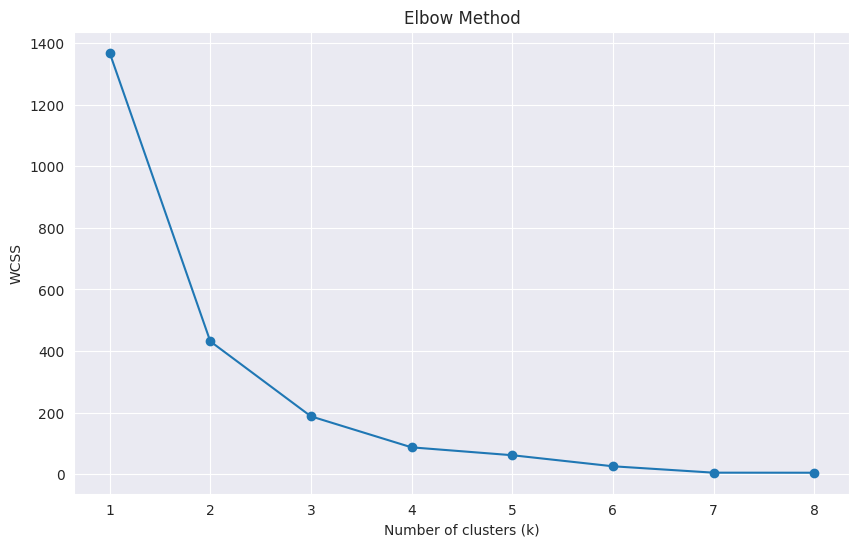

Optimal number of clusters: 5


KMeans(n_clusters=np.int64(5), random_state=0)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from seaborn import set_style
set_style('darkgrid')



X = data.drop('target', axis=1)


wcss = []
max_k = 8

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# رسم نمودار Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# محاسبه optimal_k به صورت خودکار
diff = np.diff(wcss)
diff2 = np.diff(diff)
optimal_k = np.argmin(diff2) + 2
print(f"Optimal number of clusters: {optimal_k}")

# اجرای K-Means با k بهینه
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X)



In [5]:

data['Cluster'] = kmeans.labels_



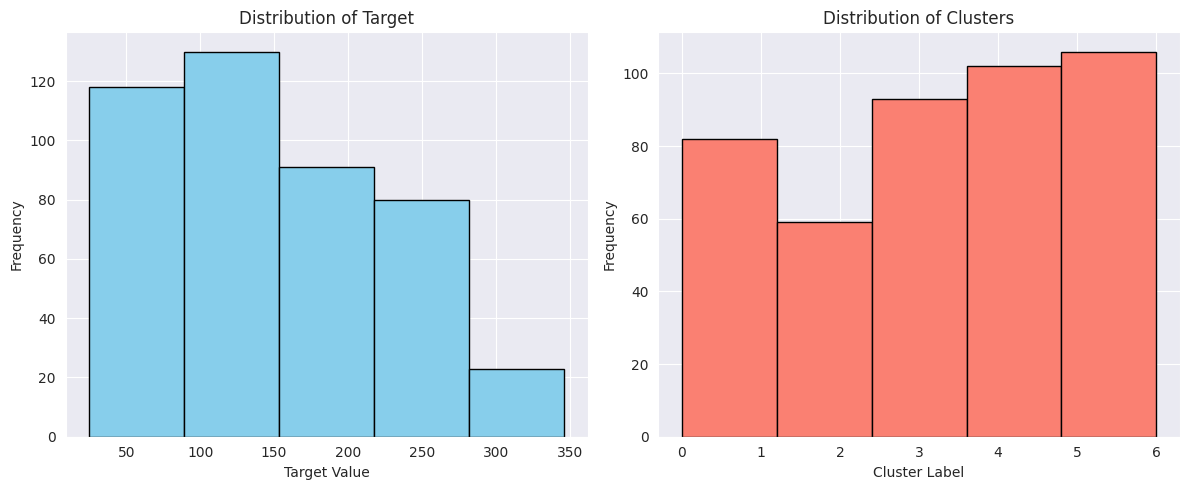

In [7]:
plt.figure(figsize=(12, 5))

# هیستوگرام Target
plt.subplot(1, 2, 1)
plt.hist(data['target'], bins=optimal_k, color='skyblue', edgecolor='black')
plt.title('Distribution of Target')
plt.xlabel('Target Value')
plt.ylabel('Frequency')

# هیستوگرام Cluster
plt.subplot(1, 2, 2)
plt.hist(data['Cluster'], bins=optimal_k, color='salmon', edgecolor='black')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
# اجرای K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(data.drop('target', axis=1))

# افزودن برچسب خوشه‌ها به داده‌ها
data['Cluster'] = clusters

In [12]:
import seaborn as sns



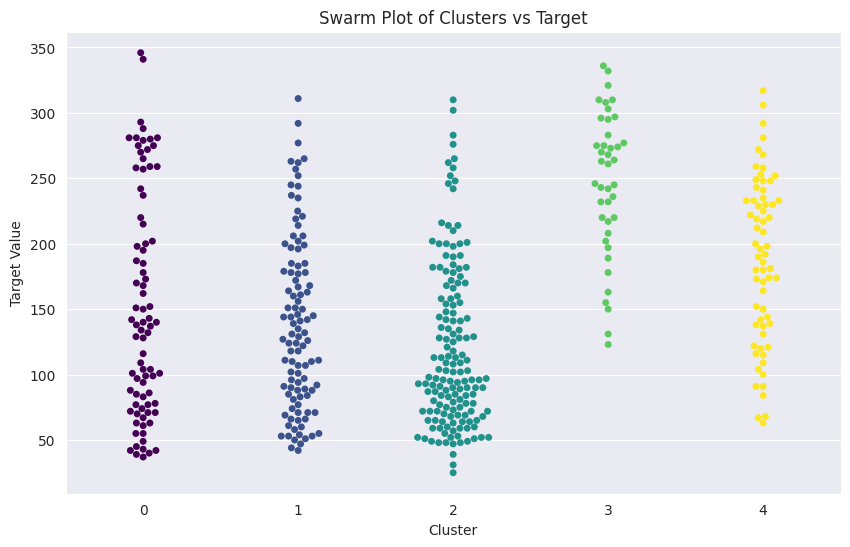

In [13]:
plt.figure(figsize=(10, 6))
sns.swarmplot(
    x='Cluster',
    y='target',
    hue='Cluster',
    data=data,
    palette='viridis',
    legend=False
)
plt.title('Swarm Plot of Clusters vs Target')
plt.xlabel('Cluster')
plt.ylabel('Target Value')
plt.show()